<a href="https://colab.research.google.com/github/shilz1007/shilz1007/blob/main/Pointnet_Model_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 663 kB 4.6 MB/s 


In [ ]:
!pip install tensorflow_graphics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 3.3 MB/s 
     |████████████████████████████████| 280 kB 78.0 MB/s 
     |████████████████████████████████| 1.1 MB 69.3 MB/s 
  Created wheel for OpenEXR: filename=OpenEXR-1.3.9-cp37-cp37m-linux_x86_64.whl size=199487 sha256=2c3a811af9f5c3455ec787d48bfca01a4d3f72b0b2be4b22e74b1f01030f7ec0
  Stored in directory: /root/.cache/pip/wheels/e3/31/09/2cb7b78bb1c4b2d44a6d11479c1bf7a66916253193e4f0eb90
Successfully built OpenEXR
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import trimesh
import tensorflow as tf
import tensorflow_graphics as tfg
from tensorflow_graphics.datasets.modelnet40 import ModelNet40


In [ ]:
import os
import h5py
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # pylint:disable=unused-import

In [ ]:
_LABELS = [
    'airplane', 'bathtub', 'bed', 'bench', 'bookshelf', 'bottle', 'bowl', 'car',
    'chair', 'cone', 'cup', 'curtain', 'desk', 'door', 'dresser', 'flower_pot',
    'glass_box', 'guitar', 'keyboard', 'lamp', 'laptop', 'mantel', 'monitor',
    'night_stand', 'person', 'piano', 'plant', 'radio', 'range_hood', 'sink',
    'sofa', 'stairs', 'stool', 'table', 'tent', 'toilet', 'tv_stand', 'vase',
    'wardrobe', 'xbox'
]

In [ ]:
# Constants
_URL = '/content/drive/MyDrive/modelnet40_ply_hdf5_2048.zip'

In [ ]:
class ModelNet40(tfds.core.GeneratorBasedBuilder):
  """ModelNet40."""

  VERSION = tfds.core.Version('1.0.0')

  @staticmethod
  def load(*args, **kwargs):
    return tfds.load('model_net40', *args, **kwargs)  

  def _info(self):
    return tfds.core.DatasetInfo(
        builder=self,
        ##description=_DESCRIPTION,
        features=tfds.features.FeaturesDict({
            'points': tfds.features.Tensor(shape=(2048, 3), dtype=tf.float32),
            'label': tfds.features.ClassLabel(names=_LABELS)
        }),
        supervised_keys=('points', 'label'),
        #homepage='https://modelnet.cs.princeton.edu',
        ##citation=_CITATION,
    )

  def _split_generators(self, download_manager):
    """Returns SplitGenerators."""

    extracted_path = download_manager.download_and_extract(_URL)

    
    return [
        tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            gen_kwargs=dict(
                filename_list_path=os.path.join(
                    extracted_path,
                    'modelnet40_ply_hdf5_2048/train_files.txt'),)),
        tfds.core.SplitGenerator(
            name=tfds.Split.TEST,
            gen_kwargs=dict(
                filename_list_path=os.path.join(
                    extracted_path,
                    'modelnet40_ply_hdf5_2048/test_files.txt'),)),
    ]

  def _generate_examples(self, filename_list_path):
    """Yields examples."""

    ancestor_path = os.path.dirname(os.path.dirname(filename_list_path))
    with tf.io.gfile.GFile(filename_list_path, 'r') as fid:
      filename_list = fid.readlines()
    filename_list = [line.rstrip()[5:] for line in filename_list]

    example_key = -1  
    for filename in filename_list:
      h5path = os.path.join(ancestor_path, filename)

      with h5py.File(h5path, 'r') as h5file:
        points = h5file['data'][:]  # shape=(2048, 2048, 3)
        label = h5file['label'][:]  # shape=(2048, )

        models_per_file = points.shape[0]
        for imodel in range(models_per_file):
          example_key += 1
          yield example_key, {
              'points': points[imodel, :, :],
              'label': int(label[imodel])
          }

In [ ]:
ds_train, info = ModelNet40.load(
      split="train", data_dir="/content/drive/MyDrive/modelnet40", with_info=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
ds_test, info = ModelNet40.load(
      split="test", data_dir="/content/drive/MyDrive/modelnet40", with_info=True)

In [ ]:
print("Example of string='{}' to ID#={}".format(
      "airplane", info.features["label"].str2int("airplane")))
print("Example of ID#={} to string='{}'".format(
      12, info.features["label"].int2str(12)))

Example of string='airplane' to ID#=0
Example of ID#=12 to string='desk'


In [ ]:
for i in range(40):
  print(info.features["label"].int2str(i))

airplane
bathtub
bed
bench
bookshelf
bottle
bowl
car
chair
cone
cup
curtain
desk
door
dresser
flower_pot
glass_box
guitar
keyboard
lamp
laptop
mantel
monitor
night_stand
person
piano
plant
radio
range_hood
sink
sofa
stairs
stool
table
tent
toilet
tv_stand
vase
wardrobe
xbox


In [ ]:
ds_train

<PrefetchDataset element_spec={'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'points': TensorSpec(shape=(2048, 3), dtype=tf.float32, name=None)}>

In [ ]:
ds_test

<PrefetchDataset element_spec={'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'points': TensorSpec(shape=(2048, 3), dtype=tf.float32, name=None)}>

In [ ]:
train_points = []
train_labels = []

In [ ]:
import numpy as np

In [ ]:
for examples in ds_train:
  points = examples['points']
  label =  examples['label']
  train_points.append(points)
  train_labels.append(label)
train_points = np.array(train_points)
train_labels = np.array(train_labels)  

In [ ]:
train_points.shape
train_labels.shape

(9840,)

In [ ]:
test_points = []
test_labels = []

In [ ]:
for examples in ds_test:
  test_points = examples['points']
  test_label =  examples['label']
  test_points.append(points)
  test_labels.append(label)
test_points = np.array(test_points)
test_labels = np.array(test_labels)  

In [ ]:
points

<tf.Tensor: shape=(2048, 3), dtype=float32, numpy=
array([[-0.07808328, -0.83174926,  0.22577927],
       [-0.03698633,  0.33876282, -0.3206838 ],
       [ 0.06202465,  0.56744844,  0.3106861 ],
       ...,
       [-0.23760992,  0.7728923 , -0.05531693],
       [-0.2954806 , -0.40292472, -0.01038125],
       [ 0.22824031, -0.7242843 , -0.11598795]], dtype=float32)>

In [ ]:
input_pt = tf.shape(points)

In [ ]:
input_pt

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2048,    3], dtype=int32)>

In [ ]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=37>

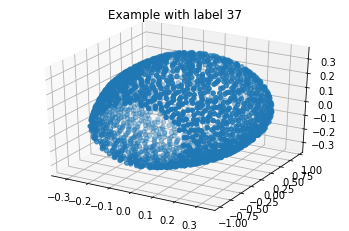

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(111, projection="3d")
ax3.set_title("Example with label {}".format(label))
scatter3 = lambda p, c="r", *args: ax3.scatter(p[:, 0], p[:, 1], p[:, 2], c)
scatter3(points)

In [ ]:
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,Model,activations
from tensorflow.keras.layers import Activation,Dense,Flatten,Conv1D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

In [ ]:
def conv_layer(x,filters):
  x = layers.Conv1D(filters,kernel_size=1,padding='valid')(x)
  x = layers.BatchNormalization(momentum=0.0)(x)
  return layers.Activation('relu')(x)

def dense_layers(x,filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [ ]:
class OrthogonalRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [ ]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = tf.keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_layer(inputs, 32)
    x = conv_layer(x, 64)
    x = conv_layer(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_layers(x, 256)
    x = dense_layers(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
input_shape =input_pt

In [ ]:
inputs = tf.keras.Input(shape=input_shape)

x = tnet(inputs, 3)
x = conv_layer(x, 64)
x = conv_layer(x, 64)
x = tnet(x, 64)
x = conv_layer(x, 64)
x = conv_layer(x, 128)
x = conv_layer(x, 1024)
x = layers.GlobalMaxPooling1D()(x)
x = dense_layers(x, 512)
x = layers.Dropout(0.3)(x)
x = dense_layers(x, 256)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(40, activation="softmax")(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d_11 (Conv1D)             (None, 2048, 32)     128         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_17 (BatchN  (None, 2048, 32)    128         ['conv1d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_17 (Activation)     (None, 2048, 32)     0           ['batch_normalization_17[0

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
model.fit(x=train_points,y=train_labels,epochs=20,batch_size=32)

Epoch 1/20
308/308 [==============================] - 51s 166ms/step - loss: 2.6823 - sparse_categorical_accuracy: 0.8282
Epoch 2/20
308/308 [==============================] - 51s 167ms/step - loss: 2.6873 - sparse_categorical_accuracy: 0.8264
Epoch 3/20
308/308 [==============================] - 51s 167ms/step - loss: 2.6557 - sparse_categorical_accuracy: 0.8389
Epoch 4/20
308/308 [==============================] - 51s 167ms/step - loss: 2.6200 - sparse_categorical_accuracy: 0.8449
Epoch 5/20
308/308 [==============================] - 51s 166ms/step - loss: 2.6017 - sparse_categorical_accuracy: 0.8522
Epoch 6/20
308/308 [==============================] - 51s 167ms/step - loss: 2.5903 - sparse_categorical_accuracy: 0.8520
Epoch 7/20
308/308 [==============================] - 51s 166ms/step - loss: 2.5747 - sparse_categorical_accuracy: 0.8589
Epoch 8/20
308/308 [==============================] - 51s 167ms/step - loss: 2.5643 - sparse_categorical_accuracy: 0.8584
Epoch 9/20
308/308 [====